In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm
from PIL import Image, ImageDraw, ImageFont

In [3]:
price_csv = pd.read_csv("Files/master_df2.csv")

In [4]:
price_csv.head()

,Unnamed: 0,Date,Company,COD_Price,Avr_sentiment,Sum_sentiment
0,0,2017-01-23,Apple,0.067,-2.882592,-28.825920
1,1,2017-01-24,Apple,-0.092,-3.987725,-39.877254
2,2,2017-01-25,Apple,1.592,-3.238096,-32.380961
3,3,2017-01-26,Apple,0.049,-10.242322,-102.423221
4,4,2017-01-27,Apple,0.008,1.701028,10.206169


# TTest

In [5]:
x = list(price_csv["Avr_sentiment"])
y = list(price_csv["COD_Price"])
stats.ttest_ind(x,y, axis=0, equal_var=False )

Ttest_indResult(statistic=-2.166276947929667, pvalue=0.030689661494186008)

# Regression Analysis(Scipy)

In [6]:
(slope, intercept,rvalue,pvalue, stderr)=linregress(x,y)
fit = slope * price_csv["Avr_sentiment"] + intercept
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})

In [17]:
reg_df.head()

,Slope,Intercept,Rvalue,Pvalue,StdErr
0,0.046043,0.093306,0.151747,0.000663,0.013439


# Regression Analysis(StatModels)

In [7]:
avr_sent = list(price_csv["Avr_sentiment"])
price_ch = list(price_csv["COD_Price"])
mod = smf.ols(formula='price_ch ~ avr_sent', data=price_csv)
res = mod.fit()
print(res.summary())
predictedValues = res.predict()

                            OLS Regression Results                            
Dep. Variable:               price_ch   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     11.74
Date:                Wed, 23 Jan 2019   Prob (F-statistic):           0.000663
Time:                        17:32:24   Log-Likelihood:                -939.01
No. Observations:                 500   AIC:                             1882.
Df Residuals:                     498   BIC:                             1890.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0933      0.071      1.311      0.1

# Graphical Regression

<IPython.core.display.Javascript object>


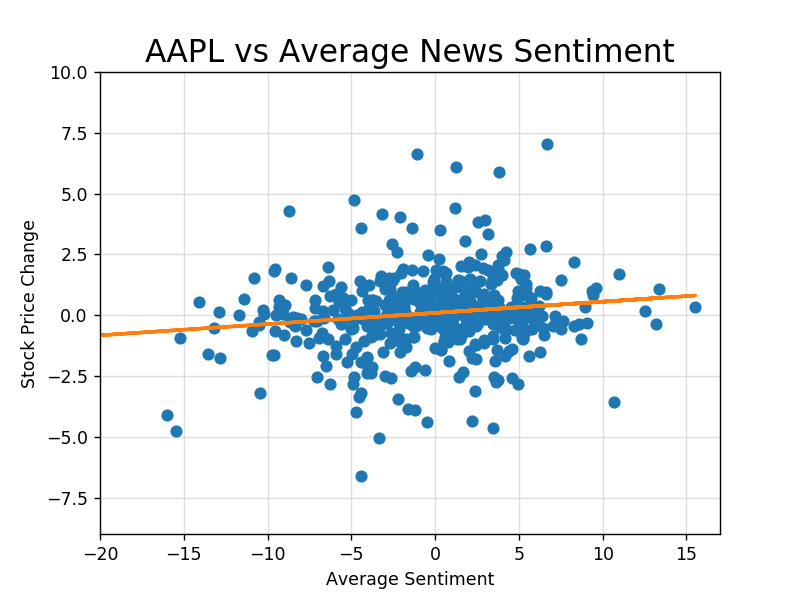

In [14]:
%matplotlib notebook
fig, ax = plt.subplots()
#fig.sptitle("afasfasf", fontsize=16, fontweight="bold")
ax.set_ylim(-9,10)
ax.set_xlim(-20,17)

ax.plot(x,y, linewidth=0, marker="o")
ax.plot(x, fit, linewidth=2)

plt.xlabel("Average Sentiment")
plt.ylabel("Stock Price Change")
plt.title("AAPL vs Average News Sentiment", fontsize=18)
plt.grid(alpha=0.4)
plt.savefig('Files/regression_scatter.png')

# Normal Distribution Test

<IPython.core.display.Javascript object>


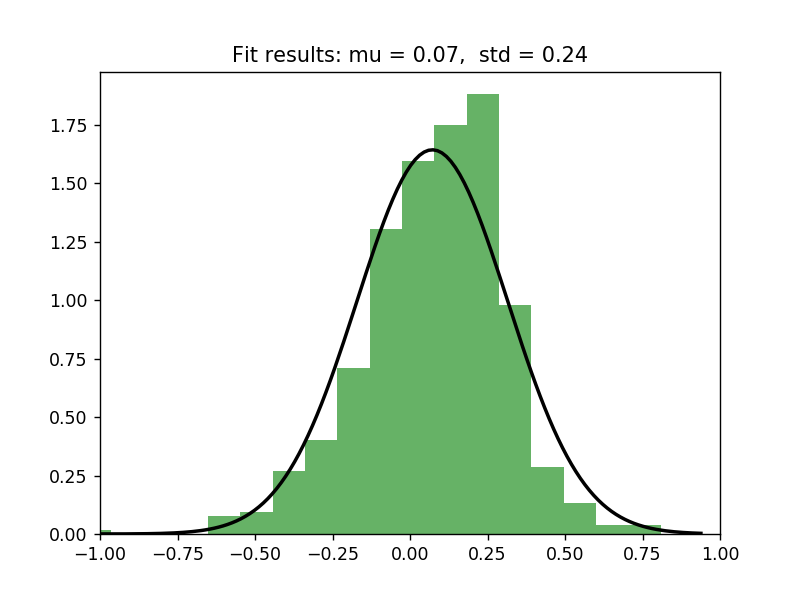

In [16]:
%matplotlib notebook
# Generate some data for this demonstration.

data =predictedValues

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlim(-1,1)
plt.show()

In [17]:
predictedValues.mean()


0.07199800000000002